In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
train_df = pd.read_csv('/content/Corona_NLP_train.csv',encoding='latin1')
test_df = pd.read_csv('/content/Corona_NLP_test.csv',encoding='latin1')

In [3]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
train_df = train_df[['OriginalTweet','Sentiment']]

In [5]:
test_df = test_df[['OriginalTweet','Sentiment']]

In [ ]:
train_df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [7]:
def clean_tweet(tweet):
    # stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    # temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [8]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(clean_tweet)

In [9]:
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(clean_tweet)

In [10]:
labels = {j:i for i,j in enumerate(train_df.Sentiment.unique().tolist())}
inv_labels = {j:i for i,j in labels.items()}

In [ ]:
labels

{'Extremely Negative': 2,
 'Extremely Positive': 4,
 'Negative': 3,
 'Neutral': 0,
 'Positive': 1}

In [11]:
train_df.Sentiment = train_df.Sentiment.map(labels)

In [12]:
test_df.Sentiment = test_df.Sentiment.map(labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


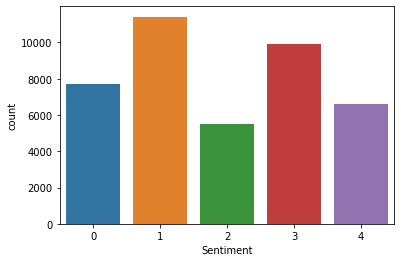

In [ ]:
sns.countplot(train_df.Sentiment)

In [ ]:
train_df

,OriginalTweet,Sentiment
0,and and,0
1,advice talk to your neighbours family to excha...,1
2,coronavirus australia woolworths to give elder...,1
3,my food stock is not the only one which is emp...,1
4,me ready to go at supermarket during the outbr...,2
...,...,...
41152,airline pilots offering to stock supermarket s...,0
41153,response to complaint not provided citing covi...,2
41154,you know it s getting tough when is rationing ...,1
41155,is it wrong that the smell of hand sanitizer i...,0


In [13]:
!pip install transformers

  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [14]:
from transformers import BertModel,BertTokenizer

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
from transformers import AdamW,get_linear_schedule_with_warmup
from tqdm import tqdm

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
print(device)

cuda


In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [19]:
class BertBaseUnCased(nn.Module):
  def __init__(self):
    super(BertBaseUnCased,self).__init__()
    self.bert = BertModel.from_pretrained('bert-base-uncased')
    self.drop = nn.Dropout(0.3)
    self.linear = nn.Linear(768,5)
  def forward(self,ids,type_ids,mask):
    x = self.bert(ids,attention_mask = mask,token_type_ids = type_ids)['pooler_output']
    x = self.drop(x)
    x = self.linear(x)
    return x

In [20]:
class CovidTweetsDataSet(Dataset):
  def __init__(self,train_data):
    self.train_data = train_data
  def __len__(self):
    return len(self.train_data)
  def __getitem__(self,idx):
    tokens = tokenizer.encode_plus(self.train_data.OriginalTweet[idx],padding='max_length',max_length=128,truncation=True,return_tensors='pt')
    label = self.train_data.Sentiment[idx]
    return tokens['input_ids'][0],tokens['token_type_ids'][0],tokens['attention_mask'][0],label

In [21]:
train = CovidTweetsDataSet(train_df)

In [22]:
trainloader = DataLoader(train,batch_size=16)

In [ ]:
model = BertBaseUnCased().to(device)
model.train()

In [24]:
EPOCHS = 5
train_steps = int(len(train_df)/16 * EPOCHS)

In [25]:
optimizer = AdamW(model.parameters(),lr = 3e-5)
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=train_steps)

In [26]:
criterion = nn.CrossEntropyLoss()

In [27]:
losses = []

In [ ]:
model.to(device)

In [29]:
for epoch in range(EPOCHS):
  loop = tqdm(enumerate(trainloader),total = len(trainloader))
  for idx,(tokens,token_type_ids,mask,targets) in loop:
    
      tokens = tokens.to(device)
      token_type_ids = token_type_ids.to(device)
      mask = mask.to(device)
      targets = targets.to(device)

      outputs = model(tokens,token_type_ids,mask)
      loss = criterion(outputs,targets)
      losses.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      scheduler.step()

      loop.set_description(f"Epochs [{epoch+1}/{EPOCHS}]")
      loop.set_postfix(loss = loss.item())

Epochs [5/5]: 100%|██████████| 2573/2573 [29:15<00:00,  1.47it/s, loss=0.013]


In [32]:
test = CovidTweetsDataSet(test_df)
testloader = DataLoader(test,batch_size=64)

In [31]:
def check_accuracy(model,loader):
  model.eval()
  model.to('cpu')
  total_size = 0
  total_correct = 0
  with torch.no_grad():
    for tokens,token_type_ids,mask,targets in loader:
      batch_size = tokens.shape[0]
      preds = model(tokens,token_type_ids,mask)
      outputs = preds.argmax(dim=1)
      total_correct = total_correct + torch.sum(outputs == targets).item()
      total_size = total_size + batch_size
  model.train()
  return (total_correct/total_size) * 100

In [33]:
accuracy = check_accuracy(model,testloader)

In [34]:
print(accuracy)

87.20379146919431


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


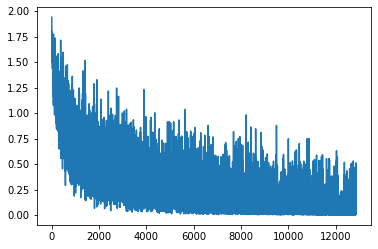

In [30]:
sns.lineplot(list(range(len(losses))),losses)

In [42]:
len(losses)

12865

In [43]:
train_steps

12861

In [35]:
sent1 = 'I hate covid it is so bad here'
sent2 = 'covid has got our family together i am so happy'

In [36]:
def make_prediction(sent):
  model.to('cpu')
  with torch.no_grad():
    tokens = tokenizer.encode_plus(sent,padding='max_length',max_length=128,truncation=True,return_tensors='pt')
    preds = model(tokens['input_ids'],tokens['token_type_ids'],tokens['attention_mask'])
    output = preds[0].argmax().item()
    return inv_labels.get(output)

In [37]:
make_prediction(sent1)

'Extremely Negative'

In [38]:
make_prediction(sent2)

'Extremely Positive'

In [39]:
sent = "I am not okay with covid"

In [40]:
make_prediction(sent)

'Negative'

In [41]:
make_prediction('Hello there')

'Neutral'